In [1]:
%load_ext autoreload
%autoreload 2
%cd '~/carl/research/dev/PlasticineLab'
%pwd
%matplotlib inline
import matplotlib.pyplot as plt
import taichi as ti
import numpy as np
import cv2
import os
from plb.utils.visualization_utils import save_rgb
target_path = './datasets/0923_LiftSpread/target'
if not os.path.exists(target_path):
    os.makedirs(target_path, exist_ok=True)

/home/jianrenw/carl/research/dev/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-plgub2f5
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.11
[I 10/20/21 21:44:02.351 217786] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout


pimirives: num primitive: 3
Building primitive
action:
  dim: 6
  scale: (0.7, 0.005, 0.005, 0.005, 0.0, 0.0)
collision_group: [0.0, 0.0, 0.0]
color: (0.7568, 0.6039, 0.4196)
friction: 0.9
h: 0.3
init_pos: (0.3, 0.25, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.16, 0.0)
r: 0.03
shape: RollingPinExt
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 6
  scale: (0.01, 0.01, 0.0, 0.0, 0.0, 0.05)
collision_group: [0, 0, 1]
color: (0.7568, 0.6039, 0.4196)
friction: 50.0
init_pos: (0.65, 0.02, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.1, 0.1, 0.02)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale: ()
collision_group: [0.0, 0.0, 0.0]
color: (0.5, 0.5, 0.5)
friction: 5.0
init_pos: (0.3, 0.05, 0.5)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.2, 0.28, 0.07)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Initialize Tina Render

 n


Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
new_pos, new_size: (0.32, 0.13, 0.5) (0.15, 0.03, 0.15)
new tool_pos: (0.3353340413201162, 0.21907182879292755, 0.5)
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
new_pos, new_size: (0.32, 0.15000000000000002, 0.5) (0.15, 0.05, 0.15)
new tool_pos: (0.27125164350083075, 0.22715456342077991, 0.5)
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
new_pos, new_size: (0.4, 0.13, 0.5) (0.18, 0.03, 0.18)
new tool_pos: (0.2747456926240858, 0.23495598637268977, 0.5)
Env reset: No initial state during cache generation
Generating target, skipp

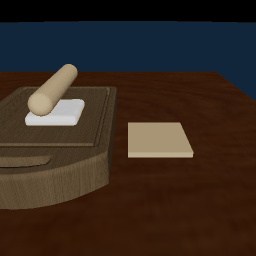

In [5]:
import lzma
import pickle
import numpy as np
import os
from plb.utils.visualization_utils import save_numpy_as_gif
from imitation.env_spec import set_render_mode
np.random.seed(0)
from plb.envs.multitask_env import MultitaskPlasticineEnv
env = MultitaskPlasticineEnv(cfg_path=f'lift_spread.yml', generating_cached_state=True)
set_render_mode(env, 'LiftSpread-v1', 'mesh')
taichi_env = env.taichi_env

N = 2
xs = np.linspace(0.32, 0.4, N)

def randomize_tool_state(cfg, box_min_x, pin_min_y):
    # No change on the init position of the box
#         pos = eval(cfg.PRIMITIVES[1]['init_pos'])
#         box_dist = np.random.rand() * 0.1 + 0.05
#         cfg.PRIMITIVES[1]['init_pos'] = (float(box_min_x + box_dist), pos[1], pos[2])

    pos = eval(cfg.PRIMITIVES[0]['init_pos'])
    height = np.random.rand() * 0.1 
    x_shift = np.random.rand() * 0.1 - 0.05
    new_pos = (pos[0] + x_shift, float(pin_min_y + height), pos[2])
    cfg.PRIMITIVES[0]['init_pos'] = new_pos
    print("new tool_pos:", new_pos)


def case1(cfg): # Sphere
    rs = np.linspace(0.04, 0.07, N)
    # print('setting x pos {}, radius {}'.format(xs[i], rs[j]))
    pos = eval(cfg.SHAPES[0]['init_pos'])
#     cfg.SHAPES[0]['shape'] = 'sphere'
#     del cfg.SHAPES[0]['width']
    cfg.SHAPES[0]['radius'] = rs[j]
    new_pos = (xs[i], rs[j] + 0.1, pos[2])
    cfg.SHAPES[0]['init_pos'] = new_pos    

    randomize_tool_state(cfg, xs[i] + rs[j], rs[j]*2 + 0.1)

def case11(cfg): # Sphere on initial place
    rs = np.linspace(0.04, 0.07, N)
    # print('setting x pos {}, radius {}'.format(xs[i], rs[j]))
    pos = eval(cfg.SHAPES[0]['init_pos'])
    cfg.SHAPES[0]['shape'] = 'sphere'
#     del cfg.SHAPES[0]['width']
    cfg.SHAPES[0]['radius'] = rs[j]
    new_pos = (pos[0], rs[j] + 0.03, pos[2])
    cfg.SHAPES[0]['init_pos'] = new_pos    

    randomize_tool_state(cfg, xs[i] + rs[j], rs[j]*2 + 0.1)
    
def case2(cfg): # Capsule
    rs = np.linspace(0.04, 0.06, N)
    capsule_h = 0.2
    # print('setting x pos {}, radius {}, height {}'.format(xs[i], rs[j], capsule_h))

    pos = eval(cfg.SHAPES[0]['init_pos'])
    cfg.SHAPES[0]['shape'] = 'capsule'
    del cfg.SHAPES[0]['width']
    cfg.SHAPES[0]['radius'] = rs[j]
    cfg.SHAPES[0]['height'] = capsule_h
    new_pos = (pos[0], rs[j] + 0.01, pos[2])
    cfg.SHAPES[0]['init_pos'] = new_pos

    randomize_tool_state(cfg, xs[i] + rs[j], 0.19)

def case3(cfg):
    cfg.SHAPES[0]['shape'] = 'box'
    w = np.linspace(0.15, 0.18, N)
    h = np.linspace(0.03, 0.05, N)
    w_id, h_id = np.random.randint(0, N),  np.random.randint(0, N)
    pos = eval(cfg.SHAPES[0]['init_pos'])
    new_pos = (xs[i], h[h_id] + 0.1, pos[2])
    new_size = (w[w_id], h[h_id], w[w_id])
    print("new_pos, new_size:", new_pos, new_size)
    cfg.SHAPES[0]['init_pos'] = new_pos
    cfg.SHAPES[0]['width'] = new_size
    del cfg.SHAPES[0]['radius']
    randomize_tool_state(cfg, xs[i] + w[w_id], 0.19)

target_id =0 
target_imgs = []
gifpath = os.path.join(target_path, 'vis_all.gif')
for case_id, case in enumerate([case3]):
    for i in range(N):
        for j in range(N):
            env.reset(target_cfg_modifier=case)
            img = taichi_env.render(mode='rgb', img_size=256)
            state = taichi_env.get_state()
            np.save(os.path.join(target_path, f'target_{target_id}.npy'), taichi_env.simulator.get_x(0))
            save_rgb(os.path.join(target_path, f'target_{target_id}.png'), np.array(img[:, :, :3]).astype(np.float32))
            target_id += 1
            target_imgs.append(img)
np.save(os.path.join(target_path, 'target_imgs.npy'), np.array(target_imgs))
save_numpy_as_gif(np.array(target_imgs)[:, :, :, :3], gifpath)
from IPython.display import Image
Image(gifpath)


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
<tina.mesh.trans.MeshTransform object at 0x7feea44a8a60> [[ 1.    0.    0.   -0.5 ]
 [ 0.    1.    0.   -0.55]
 [ 0.    0.    1.    1.  ]
 [ 0.    0.    0.    1.  ]]
[-0.62 -0.55 -0.44]
[1.18 0.02 1.16]
[[ 1.    0.    0.    0.3 ]
 [ 0.    0.   -1.    0.05]
 [ 0.    1.    0.    0.5 ]
 [ 0.    0.    0.    1.  ]]
<tina.mesh.trans.MeshTransform object at 0x7feea43ef520> [[ 0.     -0.      1.     -0.0142]
 [-1.      0.      0.      0.    ]
 [ 0.     -1.      0.      0.0497]
 [-0.     -0.     -0.      1.    ]]
[0.0716 0.0003 0.2006]
[0.5    0.12   0.8002]


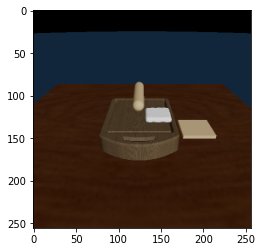

In [3]:
import matplotlib.pyplot as plt
from imitation.env_spec import set_render_mode
taichi_env.renderer.update_camera((0.3, 0.1, 0.5), 0., -0.5, 1.2)
set_render_mode(env, 'LiftSpread-v1', 'mesh')
taichi_env.renderer.verbose = True
img = taichi_env.render(mode='rgb', img_size=256)
plt.imshow(img[:, :, :3])
# taichi_env.render(mode='human', img_size=256)